In [1]:
import numpy as np
import gym
import matplotlib.pyplot as plt

In [2]:
pos_grid = np.linspace(-1.2, 0.6, 15)
vel_grid = np.linspace(-0.07, 0.07, 20)
def discretize0(obs, pos_grid, vel_grid):
    obs0 = obs[0]
    pos = obs0[0]
    vel = obs0[1]
    pos_dis = (np.digitize(pos, pos_grid))
    vel_dis = (np.digitize(vel, vel_grid))
    return (pos_dis, vel_dis)

def discretize(obs, pos_grid, vel_grid):
    pos = obs[0]
    vel = obs[1]
    pos_dis = (np.digitize(pos, pos_grid))
    vel_dis = (np.digitize(vel, vel_grid))
    return (pos_dis, vel_dis)
def bestMove(Q_vals, s, a_list):
    values = np.array([Q_vals[s,a] for a in a_list])
    action = np.argmax(values)

    return action
    


In [3]:

env = gym.make('MountainCar-v0')
env._max_episode_steps = 1000
n_games = 5000
alpha = 0.1
gamma = 0.9
epsilon = 1
actions = [0, 1, 2]


states = list()
for pos in range(15):
    for vel in range(20):
        states.append((pos,vel))
Q_values = {}
for s in states:
    for a in actions:
        Q_values[s, a] = 0


score = 0
total_rewards = np.zeros(n_games)
for i in range(n_games):
    done = False
    obs = env.reset()
    s = discretize0(obs, pos_grid, vel_grid)
    if i % 200 == 0 and i > 0:
        print('episode ', i, 'score ', score, 'epsilon %.3f' % epsilon)
    score = 0
    while not done:
        a = np.random.choice([0,1,2]) if np.random.random() < epsilon \
                else bestMove(Q_values, s, actions)
        obs_, reward, done, info, dic = env.step(a)
        s_ = discretize(obs_, pos_grid, vel_grid)
        score += reward
        a_ = bestMove(Q_values, s_, actions)
        Q_values[s, a] = Q_values[s, a] + \
                alpha*(reward + gamma*Q_values[s_, a_] - Q_values[s, a])
        s = s_
    total_rewards[i] = score
    epsilon = epsilon - 2/n_games if epsilon > 0.01 else 0.01


/Users/adisharma/anaconda3/envs/q/lib/python3.11/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


episode  200 score  -11513.0 epsilon 0.920
episode  400 score  -858.0 epsilon 0.840
episode  600 score  -1030.0 epsilon 0.760
episode  800 score  -628.0 epsilon 0.680
episode  1000 score  -728.0 epsilon 0.600
episode  1200 score  -313.0 epsilon 0.520
episode  1400 score  -260.0 epsilon 0.440
episode  1600 score  -156.0 epsilon 0.360
episode  1800 score  -159.0 epsilon 0.280
episode  2000 score  -330.0 epsilon 0.200
episode  2200 score  -148.0 epsilon 0.120
episode  2400 score  -187.0 epsilon 0.040
episode  2600 score  -251.0 epsilon 0.010
episode  2800 score  -160.0 epsilon 0.010
episode  3000 score  -195.0 epsilon 0.010
episode  3200 score  -148.0 epsilon 0.010
episode  3400 score  -248.0 epsilon 0.010
episode  3600 score  -165.0 epsilon 0.010
episode  3800 score  -178.0 epsilon 0.010
episode  4000 score  -157.0 epsilon 0.010
episode  4200 score  -283.0 epsilon 0.010
episode  4400 score  -227.0 epsilon 0.010
episode  4600 score  -179.0 epsilon 0.010
episode  4800 score  -208.0 epsilon

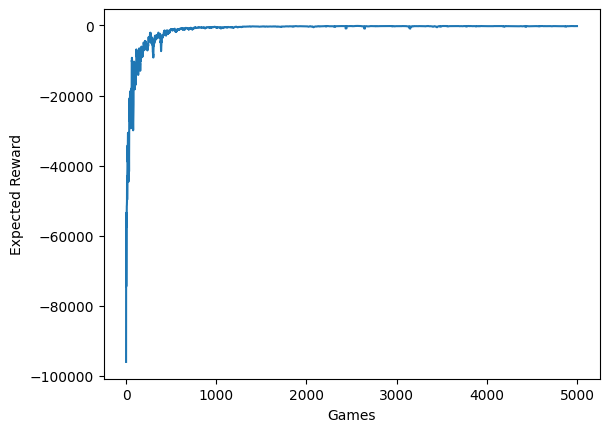

In [5]:

mean_rewards = np.zeros(n_games)
for t in range(n_games):
    mean_rewards[t] = np.mean(total_rewards[max(0, t-10):(t+1)])
plt.plot(mean_rewards)
plt.xlabel("Games")
plt.ylabel("Expected Reward")
plt.savefig('mountaincar.png')
